# Task - 3



## **Task has been mentioned at the end of this notebook**  

## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

# ______________________________
# ______________________________
df = pd.read_csv('train.csv')
df.tail()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
9995,5203,5204,C3,13,Owned,Joint,47,40,Yes,X5,NaN,NaN,19,27840.0,1
9996,35448,35449,C5,1477,Rented,Individual,34,34,No,NaN,6,1.0,4,10560.0,0
9997,47253,47254,C1,2357,Owned,Individual,64,64,No,X1,8,2.0,19,14716.0,0
9998,42544,42545,C1,1443,Rented,Individual,53,53,No,X5,14+,3.0,13,11664.0,0
9999,7864,7865,C7,1476,Owned,Joint,56,47,Yes,X2,14+,3.0,10,28752.0,0


In [3]:
# Check the shape of the dataframe

# ______________________________
# ______________________________
df.shape

(10000, 15)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

# ______________________________
# ______________________________
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

## 2. Cleaning the Data

In [5]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

# ____________________________

# ____________________________
cateogry_columns=df.select_dtypes(include=['object']).columns.tolist()
integer_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

# ____________________________
for column in df:
    if column=="Holding_Policy_Type":
        pass
    else:
        if df[column].isnull().any():
            if(column in cateogry_columns):
                df[column]=df[column].fillna(df[column].mode()[0])
            else:
                df[column]=df[column].fillna(df[column].mean())

In [6]:
df['Holding_Policy_Type'].value_counts()
df['Holding_Policy_Type']=df['Holding_Policy_Type'].fillna(3.0)

In [7]:
# Check again Holding_Policy_Duration is in object column convert that into int

# ____________________________
df=df.replace({'Holding_Policy_Duration':{'NaN':"14+"}},regex=True)
df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")
df['Holding_Policy_Duration'].astype(str).astype(int)

<ipython-input-7-41df0525c10d>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Holding_Policy_Duration']=df['Holding_Policy_Duration'].str.replace("+","")


0       14
1       10
2        3
3        1
4       14
        ..
9995    14
9996     6
9997     8
9998    14
9999    14
Name: Holding_Policy_Duration, Length: 10000, dtype: int32

In [8]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No


# ____________________________
# ____________________________
print('Accomodation_Type : ',df['Accomodation_Type'].unique())
print('Reco_Insurance_Type : ',df['Reco_Insurance_Type'].unique())
print('Is_Spouse : ',df['Is_Spouse'].unique())

Accomodation_Type :  ['Owned' 'Rented']
Reco_Insurance_Type :  ['Individual' 'Joint']
Is_Spouse :  ['No' 'Yes']


In [9]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0


# ______________________________
# ______________________________
    
df['Accomodation_Type'].replace(('Owned','Rented'), (1, 0), inplace=True)
df['Reco_Insurance_Type'].replace(('Individual','Joint'), (1, 0), inplace=True)
df['Is_Spouse'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [10]:
# Now again having a look at all those columns to see if everything went well

# _________________________________
df

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,1,1,36,36,0,X1,14,2.0,16,13320.0,0
1,33499,33500,C3,2955,1,1,66,66,0,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,0,1,24,24,0,X1,3,1.0,16,7310.0,0
3,33032,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,1,0,59,58,1,X1,14,4.0,17,23673.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5203,5204,C3,13,1,0,47,40,1,X5,14,3.0,19,27840.0,1
9996,35448,35449,C5,1477,0,1,34,34,0,X1,6,1.0,4,10560.0,0
9997,47253,47254,C1,2357,1,1,64,64,0,X1,8,2.0,19,14716.0,0
9998,42544,42545,C1,1443,0,1,53,53,0,X5,14,3.0,13,11664.0,0


In [11]:
# Observe that all those columns are now converted from Object to Int64

# ________________________________
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  object 
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [12]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

# ______________________________
# ______________________________
df.select_dtypes(include=['object']).columns.tolist()

['City_Code', 'Health Indicator', 'Holding_Policy_Duration']

In [13]:
# You can also do this to separate Object columns

# ____________________________
cat_col = df.select_dtypes(include=['object'])
cat_col

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14
...,...,...,...
9995,C3,X5,14
9996,C5,X1,6
9997,C1,X1,8
9998,C1,X5,14


In [14]:
# Lets just try to see what is happening Response. Check the output.

cat_col

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14
...,...,...,...
9995,C3,X5,14
9996,C5,X1,6
9997,C1,X1,8
9998,C1,X5,14


In [15]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape
# ______________________________
# ______________________________

df.drop('Unnamed: 0', axis = 1, inplace = True)
df.shape

(10000, 14)

In [16]:
# Getting all the Object Dtypes

cat_col.head()

,City_Code,Health Indicator,Holding_Policy_Duration
0,C3,X1,14
1,C3,X6,10
2,C1,X1,3
3,C26,X1,1
4,C2,X1,14


In [17]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

# ______________________________
# ______________________________
cat_col['City_Code'].replace(('C3','C1','C26','C2','C17','C4' ,'C16', 'C9','C23','C21','C6','C7','C11','C22','C15','C13', 'C8','C35','C29','C33','C10','C12', 'C19', 'C5' ,'C18','C14','C24','C27','C20','C34','C36','C25','C28','C32','C30','C31'), (3,1,26,2,17,4,16,9,23,21,6,7,11,22,15,13,8,35,29,33,10,12,19,5,18,14,24,27,20,34,36,25,28,32,30,31), inplace=True)
cat_col['Health Indicator'].replace(('X1','X6','X4','X2','X3','X5','X8','X7','X9'), (1,6,4,2,3,5,8,7,9), inplace=True)
cat_col['Holding_Policy_Duration'].replace(('14','10','3','1','7','13','9','8','2','4','5','11','6','12'), (14,10,3,1,7,13,9,8,2,4,5,11,6,12), inplace=True)

C:\Users\dell\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [18]:
num_col = df.select_dtypes(exclude=['object'])
num_col.head(2)

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27386,64,1,1,36,36,0,2.0,16,13320.0,0
1,33500,2955,1,1,66,66,0,1.0,19,16152.0,0


In [19]:
# Concatinating the original data frame and onehot encoded dataframe

df_encoded = pd.concat([num_col, cat_col], axis=1)
df_encoded.head()

,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response,City_Code,Health Indicator,Holding_Policy_Duration
0,27386,64,1,1,36,36,0,2.0,16,13320.0,0,3,1,14
1,33500,2955,1,1,66,66,0,1.0,19,16152.0,0,3,6,10
2,7998,1542,0,1,24,24,0,1.0,16,7310.0,0,1,1,3
3,33033,772,0,1,75,75,0,3.0,16,15792.0,0,26,1,1
4,30517,1510,1,0,59,58,1,4.0,17,23673.0,0,2,1,14


In [20]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe
df_encoded.drop(['ID','Region_Code'], axis = 1, inplace = True)
df.shape

(10000, 14)

In [21]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accomodation_Type        10000 non-null  int64  
 1   Reco_Insurance_Type      10000 non-null  int64  
 2   Upper_Age                10000 non-null  int64  
 3   Lower_Age                10000 non-null  int64  
 4   Is_Spouse                10000 non-null  int64  
 5   Holding_Policy_Type      10000 non-null  float64
 6   Reco_Policy_Cat          10000 non-null  int64  
 7   Reco_Policy_Premium      10000 non-null  float64
 8   Response                 10000 non-null  int64  
 9   City_Code                10000 non-null  int64  
 10  Health Indicator         10000 non-null  int64  
 11  Holding_Policy_Duration  10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [22]:
X = df_encoded.drop('Response',axis=1)
y = df_encoded['Response']

### Balancing an Imbalanced Data Set

In [23]:
from imblearn.under_sampling import NearMiss
nm_sampler = NearMiss()
X_sampled, y_sampled = nm_sampler.fit_resample(X,y)

In [24]:
print('Shape of X : ', X.shape)
print('Shape of y : ', y.shape)

Shape of X :  (10000, 11)
Shape of y :  (10000,)


In [25]:
print(X_sampled.shape)
print(y_sampled.shape)

(4918, 11)
(4918,)


## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sampled = scaler.fit_transform(X_sampled)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,test_size=0.2,random_state=2)

## Model Building - Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Train the Model using `Accuracy` as the evaluation metric
2. Predict
3. Evaluate use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
4. Compare the perormance of all the models

### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [29]:
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.625063548551093
Testing Accuracy Score : 0.6300813008130082


In [31]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression')

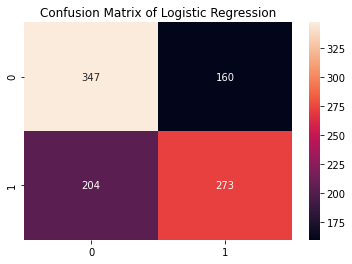

In [32]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Logistic Regression")

In [33]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.63      0.68      0.66       507
           1       0.63      0.57      0.60       477

    accuracy                           0.63       984
   macro avg       0.63      0.63      0.63       984
weighted avg       0.63      0.63      0.63       984



AUC: 0.674


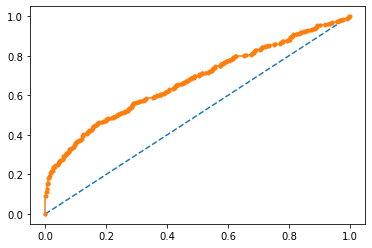

In [34]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = log_reg.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Using KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [36]:
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.7384341637010676
Testing Accuracy Score : 0.6026422764227642


In [38]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of KNN Classifier')

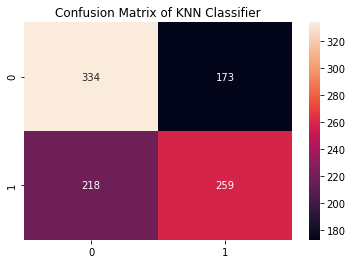

In [39]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of KNN Classifier")

In [40]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63       507
           1       0.60      0.54      0.57       477

    accuracy                           0.60       984
   macro avg       0.60      0.60      0.60       984
weighted avg       0.60      0.60      0.60       984



AUC: 0.634


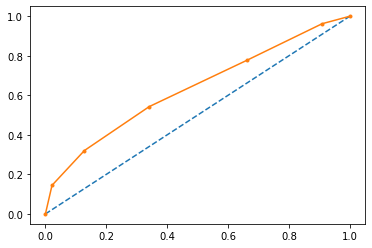

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = knn.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Using SVM

In [42]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train,y_train)

SVC(probability=True)

In [43]:
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6771733604473817
Testing Accuracy Score : 0.6554878048780488


In [45]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of SVC Classifier')

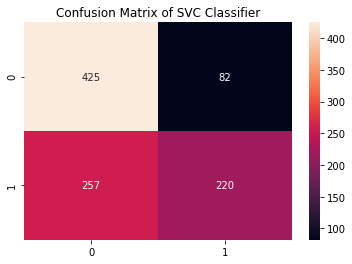

In [46]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of SVC Classifier")

In [47]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.62      0.84      0.71       507
           1       0.73      0.46      0.56       477

    accuracy                           0.66       984
   macro avg       0.68      0.65      0.64       984
weighted avg       0.67      0.66      0.64       984



AUC: 0.692


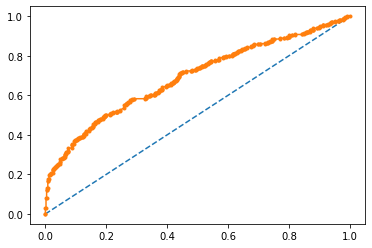

In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = svc.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [50]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 1.0
Testing Accuracy Score : 0.5813008130081301


In [52]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Classifier')

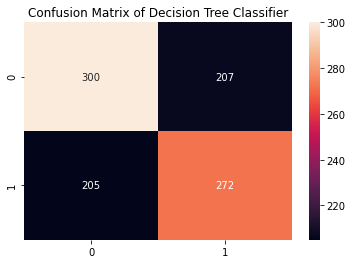

In [53]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Decision Tree Classifier")

In [54]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       507
           1       0.57      0.57      0.57       477

    accuracy                           0.58       984
   macro avg       0.58      0.58      0.58       984
weighted avg       0.58      0.58      0.58       984



AUC: 0.581


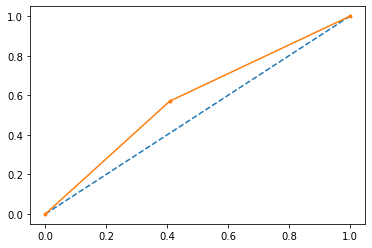

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = tree.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

## Using Ensemble Technique

#### Bagging - RandomForestClassifier 

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [57]:
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 1.0
Testing Accuracy Score : 0.6209349593495935


In [59]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of Random Forest Classifier')

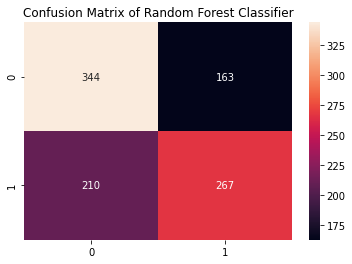

In [60]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of Random Forest Classifier")

In [61]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65       507
           1       0.62      0.56      0.59       477

    accuracy                           0.62       984
   macro avg       0.62      0.62      0.62       984
weighted avg       0.62      0.62      0.62       984



AUC: 0.672


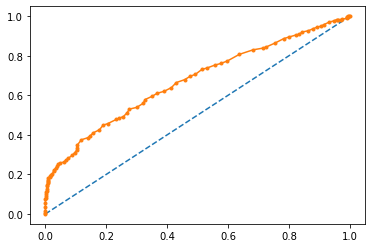

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = rfc.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

#### Boosting Technique - XGBoost

In [63]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

model_xgb = XGBClassifier()

model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [64]:
pred_train = model_xgb.predict(X_train)
pred_test = model_xgb.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.9267920691408236
Testing Accuracy Score : 0.625


In [66]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of XGBoost Classifier')

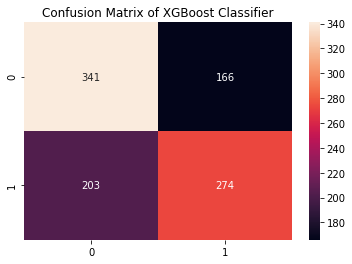

In [67]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of XGBoost Classifier")

In [68]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       507
           1       0.62      0.57      0.60       477

    accuracy                           0.62       984
   macro avg       0.62      0.62      0.62       984
weighted avg       0.62      0.62      0.62       984



AUC: 0.669


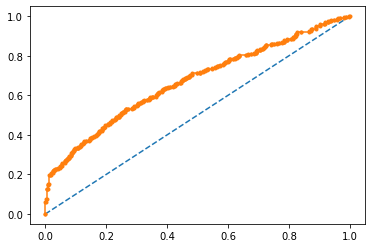

In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = model_xgb.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

#### Boosting Technique - AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ada_cls = AdaBoostClassifier()
ada_cls.fit(X_train,y_train)

AdaBoostClassifier()

In [71]:
pred_train = ada_cls.predict(X_train)
pred_test = ada_cls.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
print("Training Accuracy Score :",accuracy_score(y_train,pred_train))
print("Testing Accuracy Score :",accuracy_score(y_test,pred_test))

Training Accuracy Score : 0.6494661921708185
Testing Accuracy Score : 0.6392276422764228


In [73]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test,pred_test)

Text(0.5, 1.0, 'Confusion Matrix of AdaBoost Classifier')

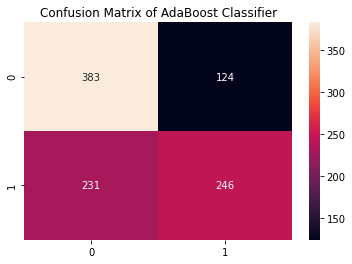

In [74]:
sns.heatmap(con_mat,annot=True,fmt='d')
plt.title("Confusion Matrix of AdaBoost Classifier")

In [75]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68       507
           1       0.66      0.52      0.58       477

    accuracy                           0.64       984
   macro avg       0.64      0.64      0.63       984
weighted avg       0.64      0.64      0.63       984



AUC: 0.689


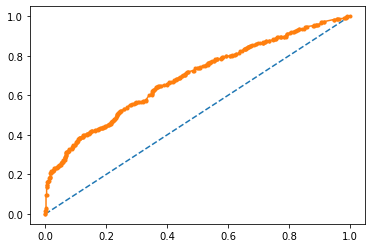

In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
prob = ada_cls.predict_proba(X_test)
# Keep probability for the positive outcome only
prob = prob[:, 1]
auc = roc_auc_score(y_test, prob)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
# Plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# Plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()